In [40]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LogisticRegression 
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler

from utils.utils import XyScaler
%matplotlib inline

In [41]:
data = pd.read_csv('merged_data.csv')
data = data.dropna()
data.head()

,Unnamed: 0,county_code,COUNTY,STATEABBREVIATION,YEAR,AMAT_fac,HIVdiagnoses,HIVincidence,HIVprevalence,MH_fac,...,pctunmetneed,nonmedpain,ADULTMEN,MSM12MTH,MSM5YEAR,%msm12month,%msm5yr,unemployment_rate,poverty_rate,household_income
0,0,1001,Autauga County,AL,2015,0.0,5.0,10.9,225.5,1.0,...,95.70,5.12,19410,333,514,1.715611,2.648120,8.5,12.8,20304
1,1,1003,Baldwin County,AL,2015,0.0,15.0,8.7,163.9,4.0,...,91.34,5.27,69724,925,1429,1.326659,2.049509,8.6,13.8,73058
2,2,1005,Barbour County,AL,2015,0.0,0.0,0.0,436.0,1.0,...,91.34,5.27,11567,82,127,0.708913,1.097951,14.2,24.1,9145
3,3,1007,Bibb County,AL,2015,0.0,0.0,0.0,191.9,0.0,...,91.86,5.62,9508,119,184,1.251578,1.935212,10.9,17.0,7078
4,4,1009,Blount County,AL,2015,0.0,5.0,10.4,95.4,1.0,...,91.86,5.62,21368,601,928,2.812617,4.342943,9.3,17.3,20934


In [69]:
y = data['HIVprevalence']
X = data.drop(columns = ['HIVprevalence','AMAT_fac','TMAT_fac','ADULTMEN','Unnamed: 0','county_code','COUNTY','STATEABBREVIATION','YEAR','MH_fac','Med_AMAT_fac','Med_MH_fac','Med_SA_fac','SA_fac','drugdeathrate','mme_percap','partD30dayrxrate','pctunins','num_SSPs','pctunmetneed','nonmedpain','MSM5YEAR','%msm12month','MSM12MTH','household_income'], axis = 1)
X

,HIVdiagnoses,HIVincidence,Med_SMAT_fac,Med_TMAT_fac,PLHIV,Population,SMAT_fac,drugdeathrate_est,drugdeaths,bup_phys,drugdep,%msm5yr,unemployment_rate,poverty_rate
0,5.0,10.9,0.0,0.0,103.0,55035.0,0.0,10.1,0.0,2.0,2.56,2.648120,8.5,12.8
1,15.0,8.7,0.0,0.0,282.0,203690.0,0.0,20.1,43.0,13.0,2.54,2.049509,8.6,13.8
2,0.0,0.0,0.0,0.0,97.0,26270.0,0.0,6.1,0.0,0.0,2.54,1.097951,14.2,24.1
3,0.0,0.0,1.0,0.0,37.0,22561.0,1.0,14.1,0.0,0.0,2.58,1.935212,10.9,17.0
4,5.0,10.4,0.0,0.0,46.0,57676.0,0.0,16.1,11.0,1.0,2.58,4.342943,9.3,17.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3135,0.0,0.0,1.0,0.0,31.0,44693.0,1.0,18.1,0.0,2.0,2.08,1.617378,5.6,12.2
3136,0.0,0.0,0.0,0.0,10.0,23073.0,0.0,8.1,0.0,2.0,2.03,0.850414,3.6,8.5
3137,0.0,0.0,0.0,0.0,0.0,20819.0,0.0,18.1,0.0,2.0,2.08,1.567356,5.8,14.2
3138,0.0,0.0,0.0,0.0,0.0,8334.0,0.0,16.1,0.0,0.0,2.09,0.859599,7.9,14.2


In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=154, shuffle=True)

In [71]:
def rss(y, y_hat):
    return np.mean((y  - y_hat)**2)

In [72]:
def cv(X, y, base_estimator, n_folds, random_seed=154, *args, **kwargs):
    """Estimate the in and out-of-sample error of a model using cross validation.
    
    Parameters
    ----------
    
    X: np.array
      Matrix of predictors.
      
    y: np.array
      Target array.
      
    base_estimator: sklearn model object.
      The estimator to fit.  Must have fit and predict methods.
      
    n_folds: int
      The number of folds in the cross validation.
      
    random_seed: int
      A seed for the random number generator, for repeatability.
    
    Returns
    -------
      
    train_cv_errors, test_cv_errors: tuple of arrays
      The training and testing errors for each fold of cross validation.
    """
    kf = KFold(n_splits=n_folds, shuffle = True, random_state=random_seed)
    test_cv_errors, train_cv_errors = np.empty(n_folds), np.empty(n_folds)
    for idx, (train_ind, test_ind) in enumerate(kf.split(X_train)):
        # Split into train and test
        X_cv_train, y_cv_train = X[train_ind], y[train_ind]
        X_cv_test, y_cv_test = X[test_ind], y[test_ind]
        # Standardize data.
        standardizer = XyScaler()
        standardizer.fit(X_cv_train, y_cv_train)
        X_cv_train_std, y_cv_train_std = standardizer.transform(X_cv_train, y_cv_train)
        X_cv_test_std, y_cv_test_std = standardizer.transform(X_cv_test, y_cv_test)
        # Fit estimator
        estimator = base_estimator#(**kwargs)
        estimator.fit(X_cv_train_std, y_cv_train_std)
        # Measure performance
        y_hat_train = estimator.predict(X_cv_train_std)
        y_hat_test = estimator.predict(X_cv_test_std)
        # Calclate the error metrics
        train_cv_errors[idx] = rss(y_cv_train_std, y_hat_train)
        test_cv_errors[idx] = rss(y_cv_test_std, y_hat_test)
    return train_cv_errors, test_cv_errors

In [73]:
def train_at_various_alphas(X, y, model, alphas, n_folds=10, **kwargs):
    """Train a regularized regression model using cross validation at various values of alpha.
    
    Parameters
    ----------
    
    X: np.array
      Matrix of predictors.
      
    y: np.array
      Target array.
      
    model: sklearn model class
      A class in sklearn that can be used to create a regularized regression object.  Options are `Ridge` and `Lasso`.
      
    alphas: numpy array
      An array of regularization parameters.
      
    n_folds: int
      Number of cross validation folds.
      
    Returns
    -------
    
    cv_errors_train, cv_errors_test: tuple of DataFrame
      DataFrames containing the training and testing errors for each value of 
      alpha and each cross validation fold.  Each row represents a CV fold,
      and each column a value of alpha.
    """
    cv_errors_train = pd.DataFrame(np.empty(shape=(n_folds, len(alphas))),
                                     columns=alphas)
    cv_errors_test = pd.DataFrame(np.empty(shape=(n_folds, len(alphas))),
                                        columns=alphas)
    for alpha in alphas:
        train_fold_errors, test_fold_errors = cv(X, y, model(alpha=alpha, **kwargs), n_folds=n_folds)
        cv_errors_train.loc[:, alpha] = train_fold_errors
        cv_errors_test.loc[:, alpha] = test_fold_errors
    return cv_errors_train, cv_errors_test

In [74]:
def get_optimal_alpha(mean_cv_errors_test):
    alphas = mean_cv_errors_test.index
    optimal_idx = np.argmin(mean_cv_errors_test.values)
    optimal_alpha = alphas[optimal_idx]
    return optimal_alpha

In [75]:
lasso_alphas = np.logspace(-4, 1, num=250)

lasso_cv_errors_train, lasso_cv_errors_test = train_at_various_alphas(
    X_train.values, y_train.values, Lasso, lasso_alphas, max_iter=10000)

In [76]:
lasso_cv_errors_test.shape

(10, 250)

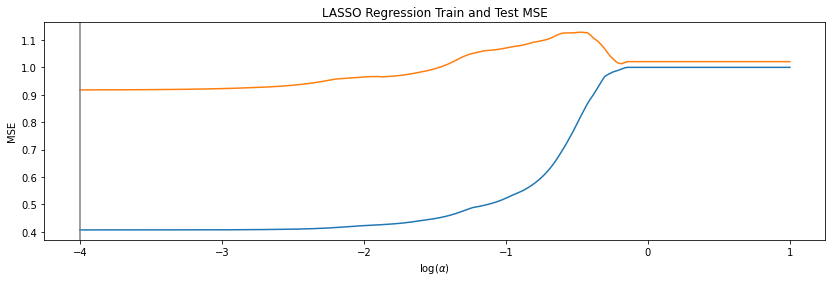

In [82]:
lasso_mean_cv_errors_train = lasso_cv_errors_train.mean(axis=0)
lasso_mean_cv_errors_test = lasso_cv_errors_test.mean(axis=0)

lasso_optimal_alpha = get_optimal_alpha(lasso_mean_cv_errors_test)
    
fig, ax = plt.subplots(figsize=(14, 4))
ax.plot(np.log10(lasso_alphas), lasso_mean_cv_errors_train)
ax.plot(np.log10(lasso_alphas), lasso_mean_cv_errors_test)
ax.axvline(np.log10(lasso_optimal_alpha), color='grey')
ax.set_title("LASSO Regression Train and Test MSE")
ax.set_xlabel(r"$\log(\alpha)$")
ax.set_ylabel("MSE")
#plt.savefig('images/LASSO_regression_train_and_test_MSE_pt2.png')

In [78]:
lasso_models = []

for alpha in lasso_alphas:
    scaler = XyScaler()
    scaler.fit(X_train.values, y_train.values)
    X_train_std, y_train_std = scaler.transform(X_train.values, y_train.values)
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train_std, y_train_std)
    lasso_models.append(lasso)

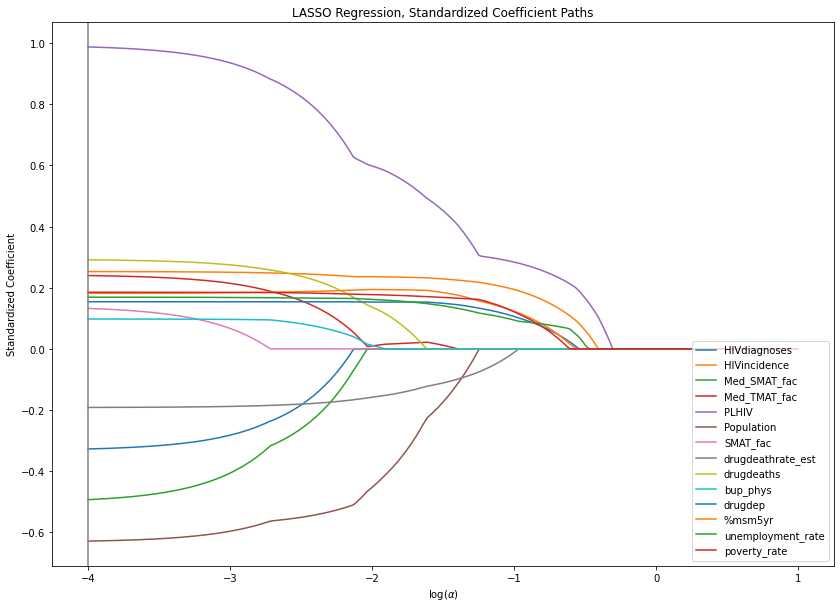

In [83]:
paths = pd.DataFrame(np.empty(shape=(len(lasso_alphas), len(X_train.columns))),
                     index=lasso_alphas, columns=X_train.columns)

for idx, model in enumerate(lasso_models):
    paths.iloc[idx] = model.coef_
    
fig, ax = plt.subplots(figsize=(14, 10))
for column in X_train.columns:
    path = paths.loc[:, column]
    ax.plot(np.log10(lasso_alphas), path, label=column)
ax.axvline(np.log10(lasso_optimal_alpha), color='grey')
ax.legend(loc='lower right')
ax.set_title("LASSO Regression, Standardized Coefficient Paths")
ax.set_xlabel(r"$\log(\alpha)$")
ax.set_ylabel("Standardized Coefficient")
plt.savefig('images/LASSO_regression_standardized_coefficient_paths_pt2.png')

In [80]:
lasso_optimal_alpha

0.0001

In [84]:
import statsmodels.api as sm

model = sm.OLS(y_train, X_train)
res = model.fit()

print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:          HIVprevalence   R-squared (uncentered):                   0.724
Model:                            OLS   Adj. R-squared (uncentered):              0.722
Method:                 Least Squares   F-statistic:                              409.3
Date:                Fri, 05 Mar 2021   Prob (F-statistic):                        0.00
Time:                        14:29:05   Log-Likelihood:                         -13857.
No. Observations:                2202   AIC:                                  2.774e+04
Df Residuals:                    2188   BIC:                                  2.782e+04
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------